<a href="https://colab.research.google.com/github/Sudu-hub/EDA_analysis/blob/main/Spaceship_dim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [406]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import gc
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [407]:
train_data = pd.read_csv("train (8).csv")
test_data = pd.read_csv("test (6).csv")

In [408]:
#merge the dataset
data = train_data.append(test_data)

In [409]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [410]:
data.duplicated().sum()

0

In [411]:
data.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [412]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [413]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


# Data preprocessing

In [414]:
# Passenger id
data["PassengerId"] = data["PassengerId"].str.replace("_","").astype("int")

In [415]:
data["PassengerId"].duplicated().sum()

0

In [416]:
# Cabin
data["Cabin"] = data["Cabin"].str.replace("/","")

In [417]:
data["Cabin"].duplicated().sum()

3144

In [418]:
# Age
data["Age"] = data["Age"].astype("str")

In [419]:
data["Age"] = data["Age"].str.split(".", expand = True)[0]

In [420]:
# RoomService)
data["RoomService"] = data["RoomService"].astype("str")
data["RoomService"] = data["RoomService"].str.split(".", expand = True)[0]

In [421]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [422]:
# foodcourt, shopping mall, Spa and Vrdeck
data["FoodCourt"] = data["FoodCourt"].astype("str")
data["ShoppingMall"] = data["ShoppingMall"].astype("str")
data["Spa"] = data["Spa"].astype("str")
data["VRDeck"] = data["VRDeck"].astype("str")

In [423]:
data["FoodCourt"] = data["FoodCourt"].str.split(".", expand = True)[0]
data["ShoppingMall"] = data["ShoppingMall"].str.split(".", expand = True)[0]
data["Spa"] = data["Spa"].str.split(".", expand = True)[0]
data["VRDeck"] = data["VRDeck"].str.split(".", expand = True)[0]

In [424]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,101,Europa,False,B0P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False
1,201,Earth,False,F0S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True
2,301,Europa,False,A0S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False
3,302,Europa,False,A0S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False
4,401,Earth,False,F1S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True


In [425]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   12970 non-null  int64 
 1   HomePlanet    12682 non-null  object
 2   CryoSleep     12660 non-null  object
 3   Cabin         12671 non-null  object
 4   Destination   12696 non-null  object
 5   Age           12970 non-null  object
 6   VIP           12674 non-null  object
 7   RoomService   12970 non-null  object
 8   FoodCourt     12970 non-null  object
 9   ShoppingMall  12970 non-null  object
 10  Spa           12970 non-null  object
 11  VRDeck        12970 non-null  object
 12  Name          12676 non-null  object
 13  Transported   8693 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.5+ MB


In [426]:
# drop the all missing value rows in data
data = data.dropna()

In [427]:
data["Age"].unique()

array(['39', '24', '58', '33', '16', '44', '26', '28', '35', '14', '34',
       '45', '32', '48', '27', '0', '1', '49', '29', '10', '7', '62',
       '15', '43', '47', '2', '20', '23', '30', '17', '55', '4', '21',
       '56', 'nan', '25', '38', '36', '22', '18', '19', '37', '42', '13',
       '40', '3', '54', '9', '6', '64', '67', '61', '31', '50', '57', '8',
       '51', '11', '41', '46', '60', '63', '5', '79', '68', '59', '74',
       '12', '65', '53', '71', '52', '75', '76', '78', '70', '73', '66',
       '69', '72', '77'], dtype=object)

# Exploratory data analysis

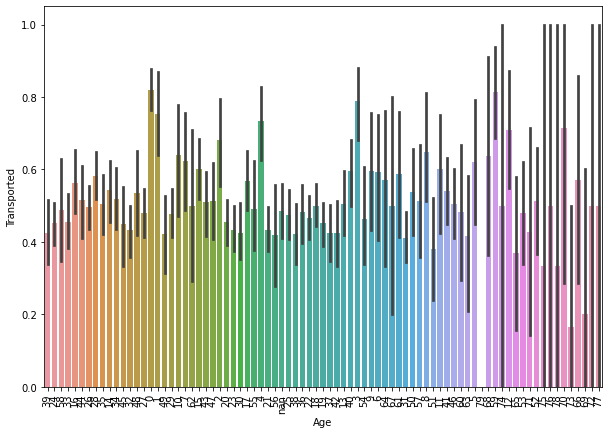

In [428]:
plt.figure(figsize = (10,7))
sns.barplot(x=data["Age"],y=data["Transported"])
plt.xticks(rotation=90)
plt.show()

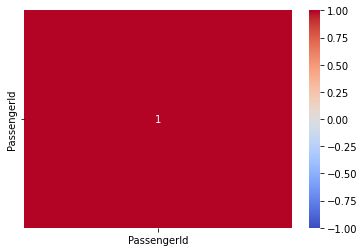

In [429]:
# heatmap corr
sns.heatmap(data.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm")

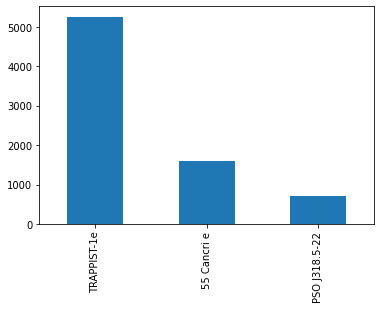

In [430]:
# barplot dastination
data["Destination"].value_counts().plot(kind="bar")

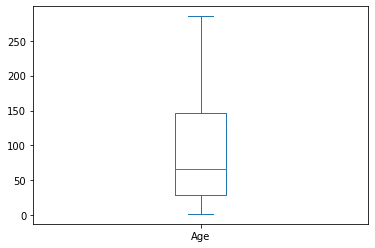

In [431]:
data["Age"].value_counts().plot(kind="box")

In [432]:
# how many is vip
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,101,Europa,False,B0P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False
1,201,Earth,False,F0S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True
2,301,Europa,False,A0S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False
3,302,Europa,False,A0S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False
4,401,Earth,False,F1S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True


In [433]:
data.shape

(7559, 14)

In [434]:
data["Age"] = data["Age"].astype(float)
data["ShoppingMall"] = data["ShoppingMall"].astype(float)
data["Spa"] = data["Spa"].astype(float)
data["VRDeck"] = data["VRDeck"].astype(float)
data["FoodCourt"] = data["FoodCourt"].astype(float)

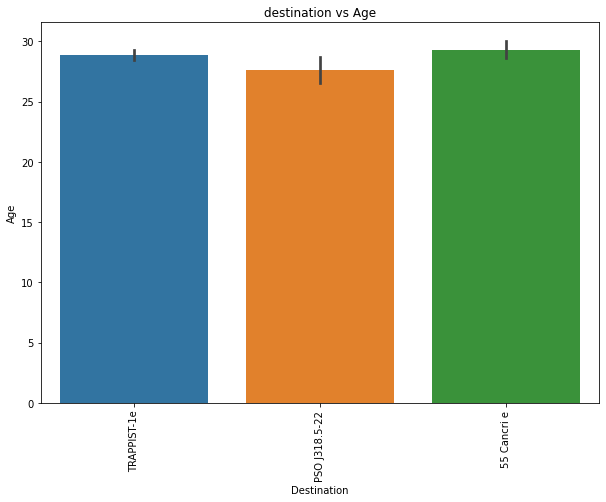

In [435]:
plt.figure(figsize = (10,7))
sns.barplot(data = data, x = "Destination", y = "Age")
plt.xticks(rotation=90)
plt.title("destination vs Age")
plt.show()

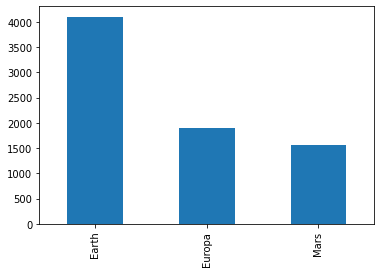

In [436]:
data["HomePlanet"].value_counts().plot(kind="bar")

Text(0, 0.5, 'VIP')

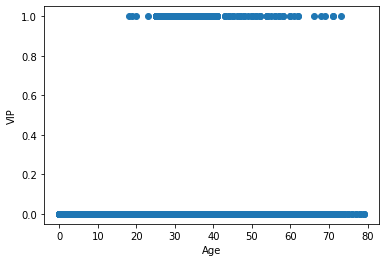

In [437]:
plt.scatter(data["Age"],data["VIP"])
plt.xlabel("Age")
plt.ylabel("VIP")

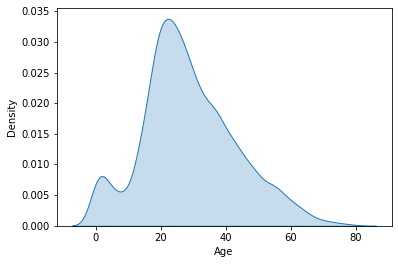

In [438]:
sns.kdeplot(x="Age",data=data,shade=True)

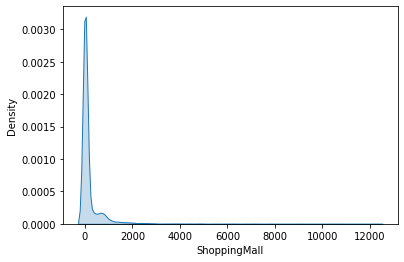

In [439]:
sns.kdeplot(x = "ShoppingMall",data=data,shade=True)

In [440]:
data.corr()

,PassengerId,Age,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,1.000000,-0.009326,-0.008338,0.014418,-0.009245,0.010833
Age,-0.009326,1.000000,0.133384,0.042132,0.121838,0.099662
FoodCourt,-0.008338,0.133384,1.000000,-0.012677,0.215335,0.229344
ShoppingMall,0.014418,0.042132,-0.012677,1.000000,0.021983,-0.001900
Spa,-0.009245,0.121838,0.215335,0.021983,1.000000,0.159520
VRDeck,0.010833,0.099662,0.229344,-0.001900,0.159520,1.000000


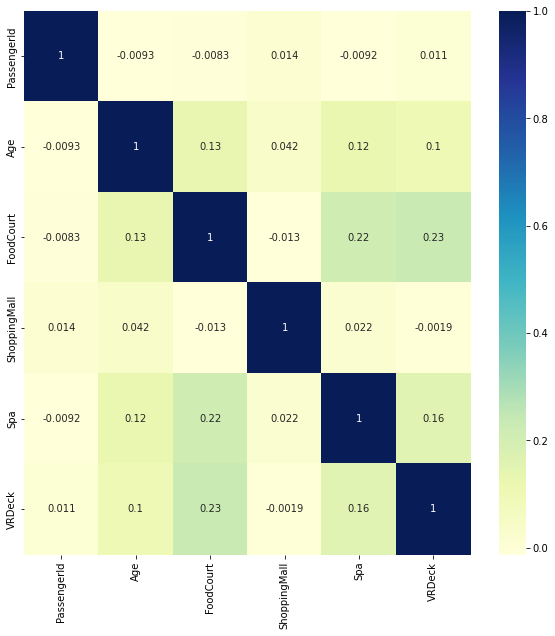

In [441]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

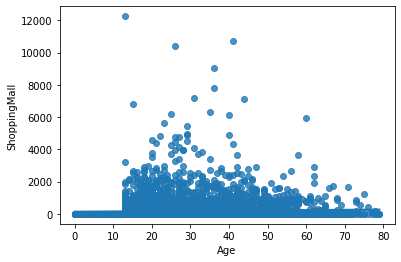

In [442]:
sns.regplot(data["Age"], data["ShoppingMall"])

In [443]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,101,Europa,False,B0P,TRAPPIST-1e,39.0,False,0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,201,Earth,False,F0S,TRAPPIST-1e,24.0,False,109,9.0,25.0,549.0,44.0,Juanna Vines,True
2,301,Europa,False,A0S,TRAPPIST-1e,58.0,True,43,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,302,Europa,False,A0S,TRAPPIST-1e,33.0,False,0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,401,Earth,False,F1S,TRAPPIST-1e,16.0,False,303,70.0,151.0,565.0,2.0,Willy Santantines,True


#feature Engineering

In [444]:
data = data.drop(columns=["VIP","RoomService","FoodCourt","Spa","VRDeck","ShoppingMall"],axis=1)

In [445]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,Name,Transported
0,101,Europa,False,B0P,TRAPPIST-1e,39.0,Maham Ofracculy,False
1,201,Earth,False,F0S,TRAPPIST-1e,24.0,Juanna Vines,True
2,301,Europa,False,A0S,TRAPPIST-1e,58.0,Altark Susent,False
3,302,Europa,False,A0S,TRAPPIST-1e,33.0,Solam Susent,False
4,401,Earth,False,F1S,TRAPPIST-1e,16.0,Willy Santantines,True


In [446]:
data["HomePlanet"] = data["HomePlanet"].map({"Europa":0,"Earth":1,"Mars":2})

In [449]:
data["CryoSleep"] = data["CryoSleep"].map({"False":0,"True":1})

In [450]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,Name,Transported
0,101,0,NaN,B0P,TRAPPIST-1e,39.0,Maham Ofracculy,False
1,201,1,NaN,F0S,TRAPPIST-1e,24.0,Juanna Vines,True
2,301,0,NaN,A0S,TRAPPIST-1e,58.0,Altark Susent,False
3,302,0,NaN,A0S,TRAPPIST-1e,33.0,Solam Susent,False
4,401,1,NaN,F1S,TRAPPIST-1e,16.0,Willy Santantines,True
